# Definizione del problema generale

Il problema della corda che compie oscillazioni trasversali unidimensionali può essere modellato con la seguente equazione differenziale:

$u_{xx}=u_{tt}$

dove la funzione $u(x,t)$ restituisce l'altezza della corda rispetto alla condizione di riposo, per ogni punto della sua estensione ($x$) in ogni momento del tempo ($t$).

Il problema della corda viene posto correttamente specificando il comportamento agli estremi e la condizione iniziale:

\begin{cases}
u(0,t)=u(l,t) \\
u(x,0)=\varphi (x) \\
u_t (x,0) = \psi (x) \\
u_{xx}=u_{tt}
\end{cases}

dove $l$ è la lunghezza della corda, $ \varphi (x)$ è la sua posizione iniziale, $\psi(x)$ è la sua velocità iniziale. Le posizioni agli estremi vengono considerate fisse e uguali in ogni momento del tempo.

# Soluzione generale
Con le seguenti condizioni iniziali

\begin{cases}

\varphi (x) = \sum_{n=1}^N A_n \sin{n \pi x} \\
\psi (x) = \sum_{n=1}^N B_n \sin{n \pi x} \\
\end{cases}

la soluzione è la seguente:

$$ u(x,t)=\sum_{n=1}^N \sin{n \pi x} \left[A_n \cos{n \pi t} + \frac{B_n}{n \pi} \sin{n \pi t}\right] $$

# Caso 1
Si vuole risolvere il problema della corda nelle seguenti condizioni:

\begin{cases}
u_{xx}=u_{tt} \\
l=\pi \\
u(x,0)=\varphi (x) \\
u_x(x,0)=\psi (x)=0 \\
u(0,t)=u(l,t)=0 
\end{cases}

dove la posizione iniziale è specificata da:

$$ \varphi(x)= \begin{cases} x \quad 0<x<\frac{\pi}{2} \\ -x+\pi \quad \frac{\pi}{2}<x<\pi \end{cases}$$

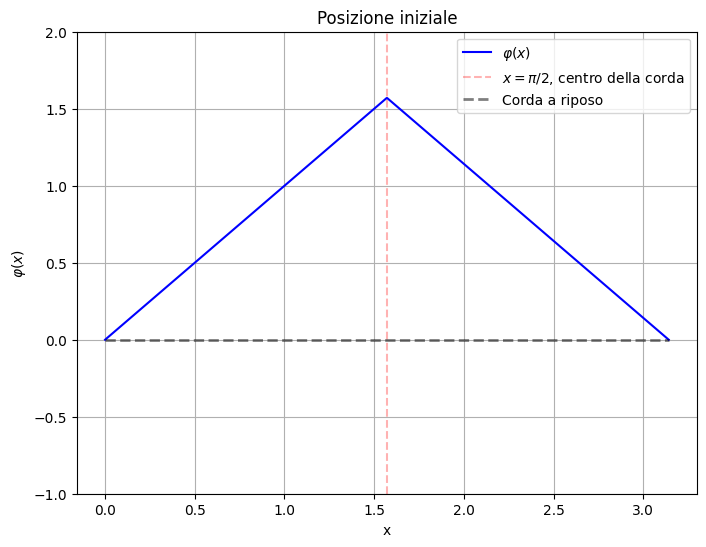

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definizione della funzione a tratti
def phi(x):
    return np.where((0 < x) & (x < np.pi/2), x, 
                    np.where((np.pi/2 < x) & (x < np.pi), -x + np.pi, 0))

# Creazione dei punti per il grafico
x = np.linspace(0, np.pi, 1000)
y = phi(x)

# Creazione del grafico
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'b-', label=r'$\varphi(x)$')
plt.axvline(x=np.pi/2, color='r', alpha=.3, linestyle='--', label=r'$x=\pi/2$, centro della corda')
plt.plot([0, np.pi],
         [0, 0],
         'k--',
         linewidth=2,
         alpha=.5,
         label='Corda a riposo')  # Segmento sull'asse x
plt.xlabel('x')
plt.ylabel(r'$\varphi(x)$')
plt.grid(True)
plt.title("Posizione iniziale")
plt.legend()
plt.ylim([-1,2])
plt.show()

## Soluzione del caso 1
Affinché sia possibile usare come soluzione dell'equazione differenziale quella presentata sopra, la funzione $\varphi(x)$ deve essere espressa come somma di seni. Questo è possibile espandendo $\varphi(x)$ in serie di Fourier.

Per evitare di avere termini in coseno, è necessario che la funzione sia prolungata in modo dispari, ovvero:

$$ \tilde{\varphi}(x)= \begin{cases}
 x \quad -\frac{\pi}{2}<x<\frac{\pi}{2} \\
 -x+\pi \quad \frac{\pi}{2}<x<\pi \\
 -x-\pi \quad -\pi < x < -\frac{\pi}{2}
 \end{cases}$$

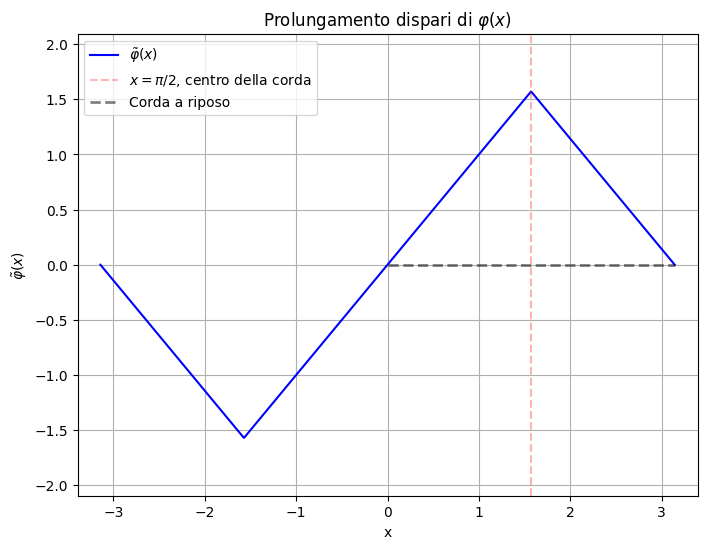

In [2]:
def phi_tilde(x):
    return np.where((-np.pi/2 < x) & (x < np.pi/2),
                        x, 
                    np.where((np.pi/2 < x) & (x < np.pi),
                                -x + np.pi,
                             np.where((-np.pi < x) & (x < -np.pi/2),
                                        -x - np.pi,
                                        0)))
    
# Creazione dei punti per il grafico
x_tilde = np.linspace(-np.pi, np.pi, 1000)
y_tilde = phi_tilde(x_tilde)

# Creazione del grafico
plt.figure(figsize=(8, 6))
plt.plot(x_tilde, y_tilde, 'b-', label=r'$\tilde{\varphi}(x)$')
plt.axvline(x=np.pi/2, color='r', alpha=.3, linestyle='--', label=r'$x=\pi/2$, centro della corda')
plt.plot([0, np.pi],
         [0, 0],
         'k--',
         linewidth=2,
         alpha=.5,
         label='Corda a riposo')  # Segmento sull'asse x
plt.xlabel('x')
plt.ylabel(r'$\tilde{\varphi}(x)$')
plt.grid(True)
plt.title(r"Prolungamento dispari di $\varphi(x)$")
plt.legend()
plt.ylim([-np.pi/1.5,np.pi/1.5])
plt.xlim([-np.pi-0.25,np.pi+0.25])
plt.show()

La condizione iniziale $\tilde{\varphi}(x)$ applicata al sistema fisico considerato richiede di prendere in considerazione solo la porzione $0<x<\pi$. Si ottiene dunque l'espansione in serie di Fourier:

$$\varphi(x) = \sum_{n=1}^\infty \frac{4}{\pi n^2} \sin{n \frac{\pi}{2}} \sin{nx}$$

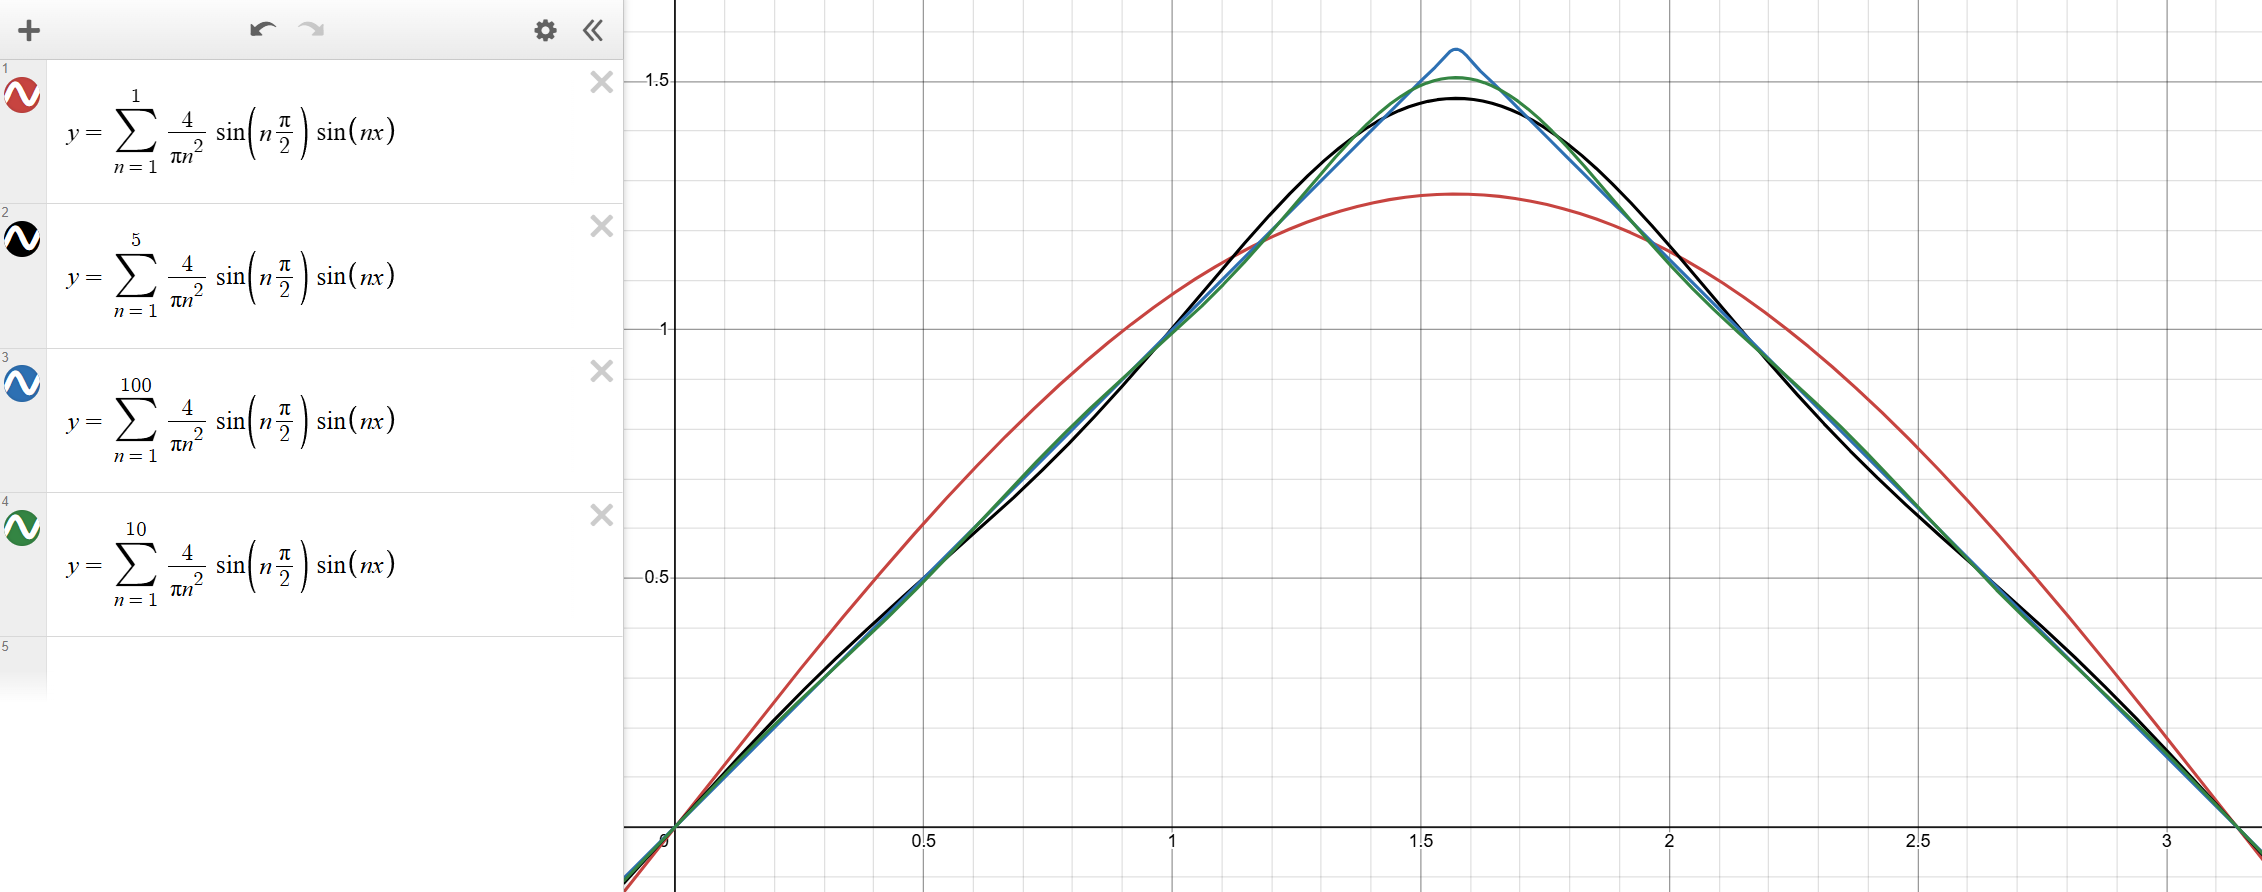

Dunque la soluzione del problema della corda è la seguente:

$$ u(x,t)= \sum_{n=0}^\infty \sin{nx}\left( \frac{4}{\pi n^2} \sin{n \frac{\pi}{2}} \cos{nt} \right)  $$

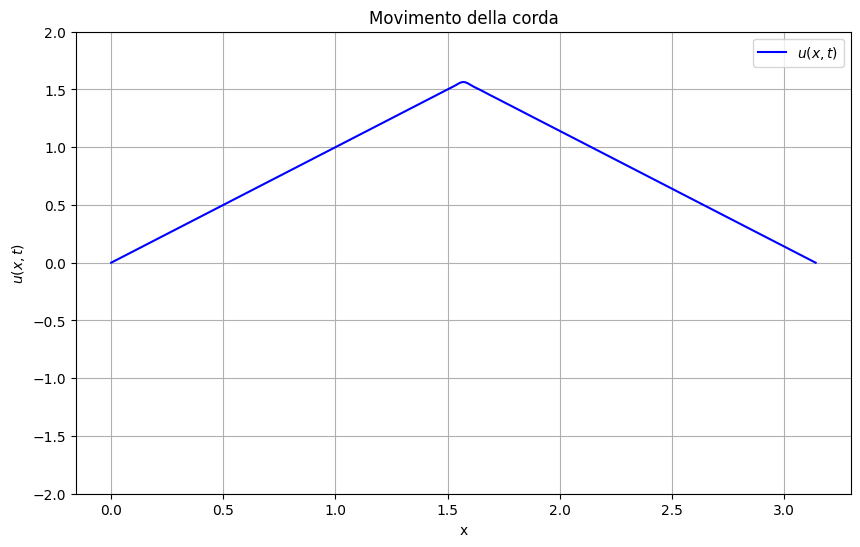

In [3]:
def uxt(n, x, t):
    mysum = 0
    for i in range(1,n):
        mysum += np.sin(i*x) * (4/(np.pi * i**2) * np.sin(i*np.pi/2) * np.cos(i*t))
    return mysum
        
# Parametri
n = 100
x_u = np.linspace(0, np.pi, 500)
t_u = np.linspace(0, 15, 120)

# Creazione della figura e degli assi
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot(x_u,
                uxt(n, x_u, t_u[0]),
                'b-',
                label=r'$u(x,t)$')
ax.set_xlabel('x')
ax.set_ylabel(r'$u(x,t)$')
ax.set_title('Movimento della corda')
ax.grid(True)
ax.legend()
ax.set_ylim(-2, 2)  # Limiti y fissati per stabilità visiva

from matplotlib.animation import FuncAnimation
# Funzione di aggiornamento per l'animazione
def update(t):
    line.set_ydata(uxt(n, x_u, t))  # Aggiorna i dati y con il nuovo tempo t
    return line,

# Creazione dell'animazione
ani = FuncAnimation(fig,
                    update, 
                    frames=t_u,
                    interval=20,
                    blit=True)

# Mostra l'animazione
plt.show()

# Opzionale: salva l'animazione come video (richiede ffmpeg installato)
ani.save('uxt_animation_1.mp4', writer='ffmpeg', fps=30)

# Caso 2

Variando la condizione iniziale rispetto al precedente:

$$\varphi(x)=\sin^3{x}$$

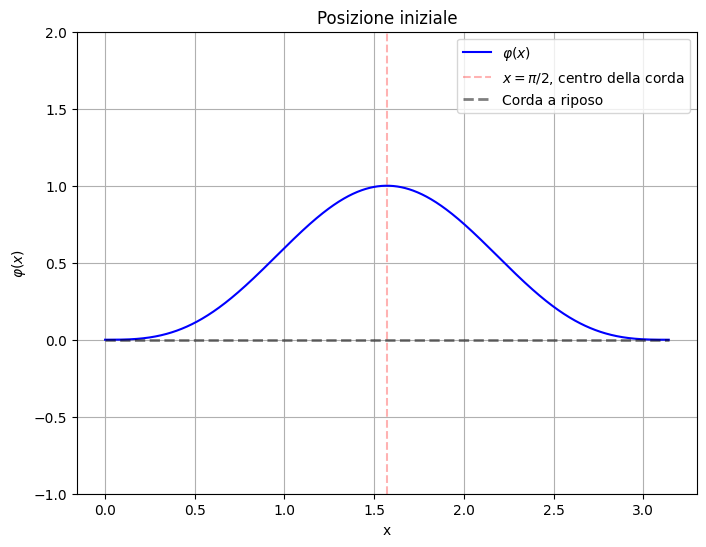

In [4]:
# Definizione della funzione a tratti

# Creazione dei punti per il grafico
x = np.linspace(0, np.pi, 1000)
y = np.sin(x)**3

# Creazione del grafico
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'b-', label=r'$\varphi(x)$')
plt.axvline(x=np.pi/2, color='r', alpha=.3, linestyle='--', label=r'$x=\pi/2$, centro della corda')
plt.plot([0, np.pi],
         [0, 0],
         'k--',
         linewidth=2,
         alpha=.5,
         label='Corda a riposo')  # Segmento sull'asse x
plt.xlabel('x')
plt.ylabel(r'$\varphi(x)$')
plt.grid(True)
plt.title("Posizione iniziale")
plt.legend()
plt.ylim([-1,2])
plt.show()

si ottiene la seguente soluzione:

$$u(x,t)=-\frac{1}{4}\sin{3x}\cos{3t}+\frac{3}{4}\sin{x}\cos{t}$$

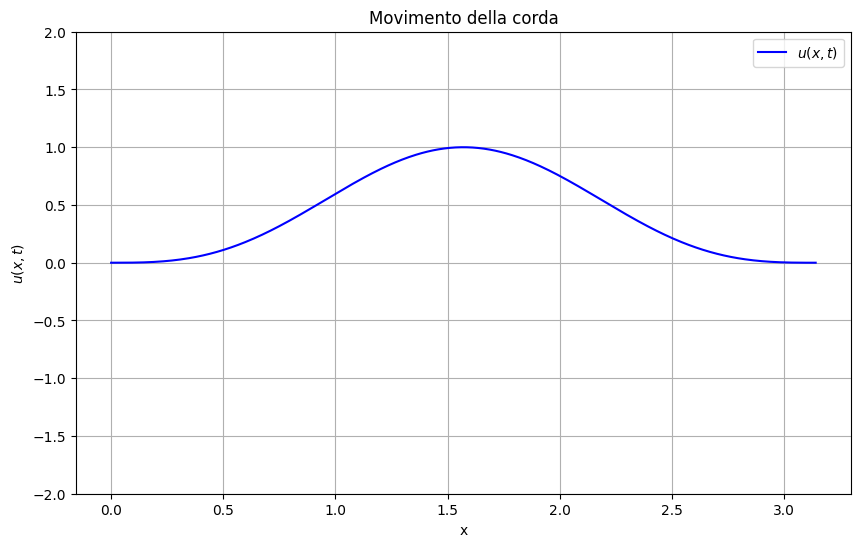

In [5]:
def uxt2(x, t):
    return -1/4*np.sin(3*x)*np.cos(3*t)+3/4*np.sin(x)*np.cos(t)
        
# Parametri
x_u = np.linspace(0, np.pi, 500)
t_u = np.linspace(0, 15, 120)

# Creazione della figura e degli assi
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot(x_u,
                uxt2(x_u, t_u[0]),
                'b-',
                label=r'$u(x,t)$')
ax.set_xlabel('x')
ax.set_ylabel(r'$u(x,t)$')
ax.set_title('Movimento della corda')
ax.grid(True)
ax.legend()
ax.set_ylim(-2, 2)  # Limiti y fissati per stabilità visiva

from matplotlib.animation import FuncAnimation
# Funzione di aggiornamento per l'animazione
def update(t):
    line.set_ydata(uxt2(x_u, t))  # Aggiorna i dati y con il nuovo tempo t
    return line,

# Creazione dell'animazione
ani = FuncAnimation(fig,
                    update, 
                    frames=t_u,
                    interval=20,
                    blit=True)

# Mostra l'animazione
plt.show()

# Opzionale: salva l'animazione come video (richiede ffmpeg installato)
ani.save('uxt_animation_2.mp4', writer='ffmpeg', fps=30)

# Caso 3

Con la seguente condizione iniziale:

$$ \varphi(x)= x(\pi-x) \quad 0<x<\pi $$

la si prolunga in modo dispari:

$$ \tilde{\varphi}(x)= \begin{cases} 
x(\pi-x) \quad 0<x<\pi \\
 x(\pi+x) \quad -\pi<x<0 
 \end{cases}$$


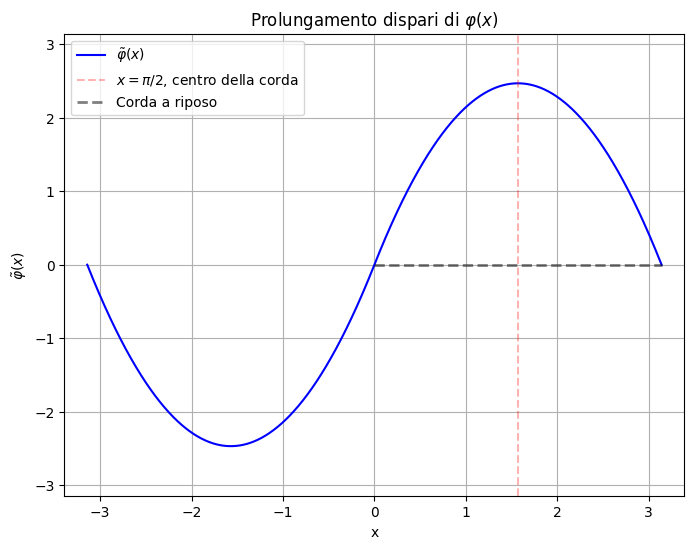

In [6]:
def phi_tilde2(x):
    return np.where((-np.pi < x) & (x < 0),
                        x*(np.pi+x), 
                    np.where((0 < x) & (x < np.pi),
                                x*(np.pi-x),
                                        0))
    
# Creazione dei punti per il grafico
x_tilde = np.linspace(-np.pi, np.pi, 1000)
y_tilde = phi_tilde2(x_tilde)

# Creazione del grafico
plt.figure(figsize=(8, 6))
plt.plot(x_tilde, y_tilde, 'b-', label=r'$\tilde{\varphi}(x)$')
plt.axvline(x=np.pi/2, color='r', alpha=.3, linestyle='--', label=r'$x=\pi/2$, centro della corda')
plt.plot([0, np.pi],
         [0, 0],
         'k--',
         linewidth=2,
         alpha=.5,
         label='Corda a riposo')  # Segmento sull'asse x
plt.xlabel('x')
plt.ylabel(r'$\tilde{\varphi}(x)$')
plt.grid(True)
plt.title(r"Prolungamento dispari di $\varphi(x)$")
plt.legend()
plt.ylim([-np.pi,np.pi])
plt.xlim([-np.pi-0.25,np.pi+0.25])
plt.show()

si sviluppa in serie di Fourier di soli seni:

$$\varphi(x)=\sum_{n=1}^\infty \sin{nx} \frac{-4}{\pi} \frac{(-1)^n-1}{n^3}$$

e si ottiene la seguente soluzione:

$$u(x,t)=\sum_{n=1}^\infty \sin{nx}  \frac{-4}{\pi} \frac{(-1)^n-1}{n^3} \cos{nt}$$

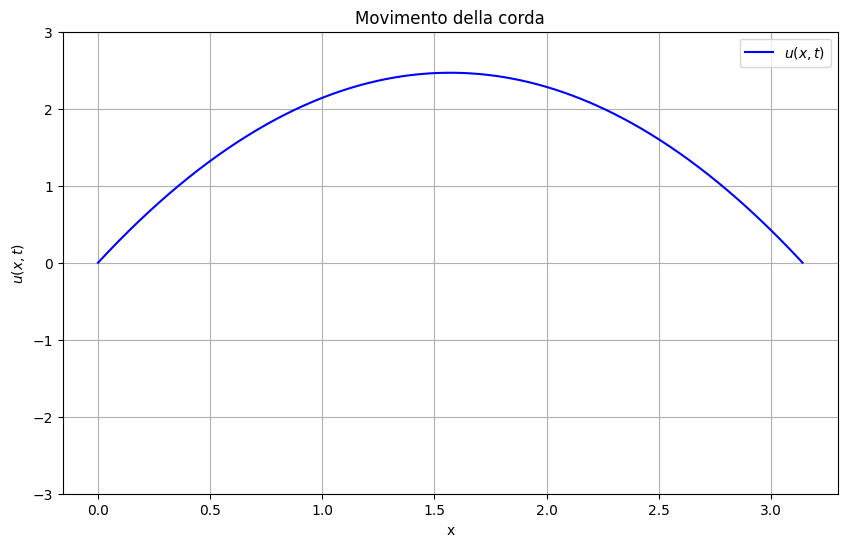

In [9]:
def uxt3(n, x, t):
    mysum = 0
    for i in range(1,n):
        mysum += np.sin(i*x) * (-4/(np.pi * i**3) * ((-1)**i - 1) * np.cos(i*t))
    return mysum
        
# Parametri
n = 100
x_u = np.linspace(0, np.pi, 500)
t_u = np.linspace(0, 15, 120)

# Creazione della figura e degli assi
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot(x_u,
                uxt3(n, x_u, t_u[0]),
                'b-',
                label=r'$u(x,t)$')
ax.set_xlabel('x')
ax.set_ylabel(r'$u(x,t)$')
ax.set_title('Movimento della corda')
ax.grid(True)
ax.legend()
ax.set_ylim(-3, 3)  # Limiti y fissati per stabilità visiva

from matplotlib.animation import FuncAnimation
# Funzione di aggiornamento per l'animazione
def update(t):
    line.set_ydata(uxt3(n, x_u, t))  # Aggiorna i dati y con il nuovo tempo t
    return line,

# Creazione dell'animazione
ani = FuncAnimation(fig,
                    update, 
                    frames=t_u,
                    interval=20,
                    blit=True)

# Mostra l'animazione
plt.show()

# Opzionale: salva l'animazione come video (richiede ffmpeg installato)
ani.save('uxt_animation_3.mp4', writer='ffmpeg', fps=30)